In [5]:
%load_ext autoreload
%autoreload 2

import healpy as hp
from read_and_make import *
from ILC_helpers import *

band = ['K', 'Ka', 'Q', 'V', 'W']
band_beam = ['K1', 'ka1', 'Q1', 'Q2', 'V1', 'V2', 'W1', 'W2', 'W3', 'W4']
nside = 512
lmax = 750
imap_dir = 'wmap_band_imap_r9_nineyear_v5'
beam_dir = 'wmap_ampl_bl_9yr_v5p1'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#Read imap
RW = Read_WMAP(band, lmax, nside)
imaps = RW.read_imap(imap_dir)

In [7]:
#Change imap to alm
alms = RW.map_to_alm(imaps)

In [8]:
#Read beam
beam_transfer_functions = RW.read_beam(band_beam, beam_dir)

In [9]:
#Calculate　Cl
ILCW = ILC_WMAP(alms, lmax, beam_transfer_functions)
Cl = ILCW.Cl_cal()

In [10]:
#Calculate weight
weights = ILCW.weight_cal(Cl)

In [11]:
#Do ILC
alm_clean = ILCW.do_ILC(weights)

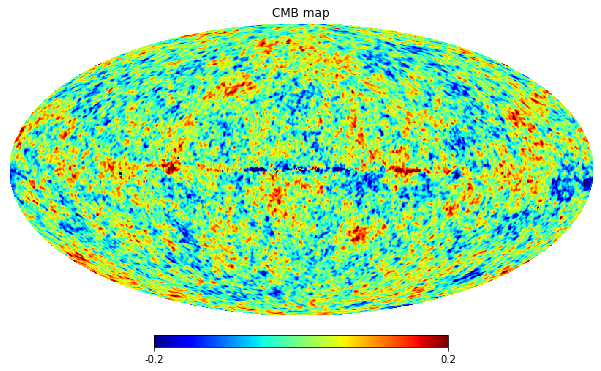

In [12]:
#Show clean cmb map
map_clean = hp.alm2map(alm_clean, nside = nside, fwhm = 1.0*np.pi/180, verbose=False)
hp.mollview(map_clean, title = 'CMB map', cmap = 'jet', max = 0.2, min = -0.2)